Stock price prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TESLA.csv to TESLA.csv


In [3]:
df = pd.read_csv('TESLA.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
5,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400


In [4]:
df.shape

(253, 7)

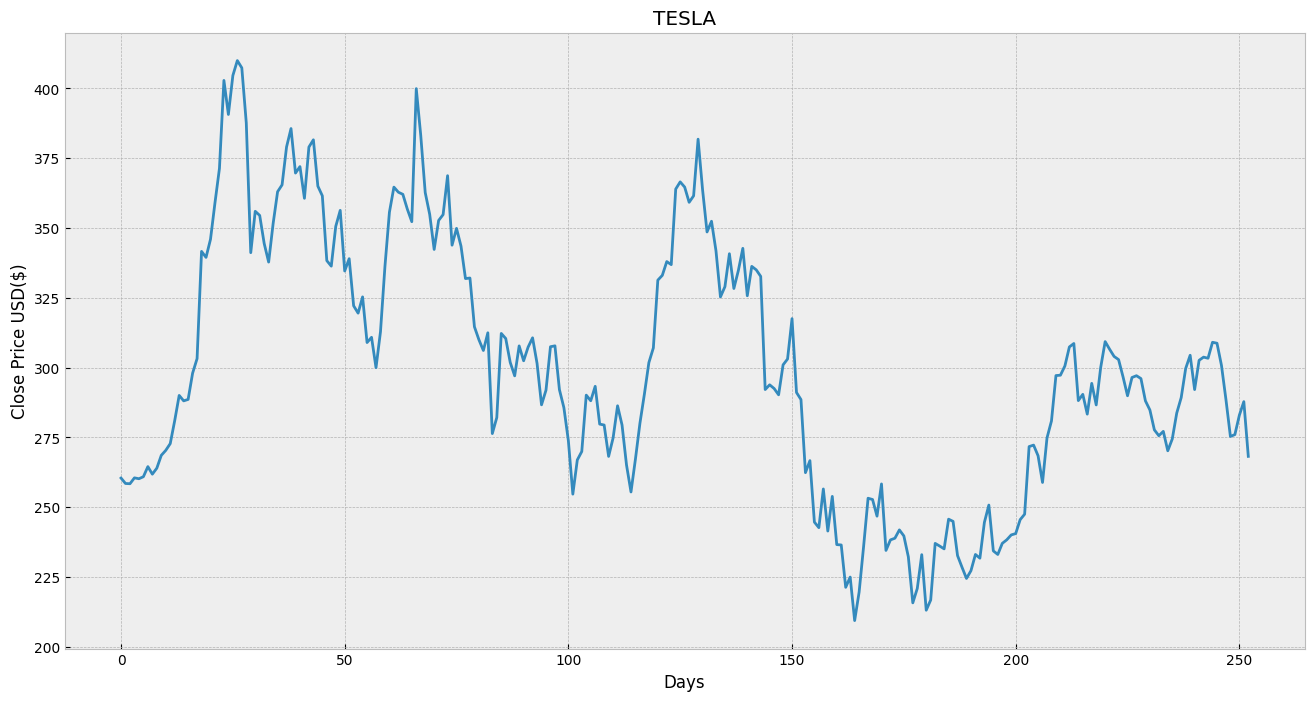

In [5]:
plt.figure(figsize=(16,8))
plt.title('TESLA')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [6]:
df = df[['Close']]
df.head(4)

,Close
0,260.436676
1,258.493347
2,258.406677
3,260.510010


In [7]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
249,276.010010,NaN
250,282.940002,NaN
251,287.809998,NaN
252,268.209991,NaN


In [8]:
X=np.array(df.drop(['Prediction'], axis=1))[:-future_days]
X

array([[260.436676],
       [258.493347],
       [258.406677],
       [260.51001 ],
       [260.196655],
       [260.916656],
       [264.536682],
       [261.829987],
       [263.980011],
       [268.573334],
       [270.359985],
       [272.773346],
       [281.01001 ],
       [290.036682],
       [288.089996],
       [288.600006],
       [298.      ],
       [303.226654],
       [341.619995],
       [339.476654],
       [345.953339],
       [359.013336],
       [371.333344],
       [402.863342],
       [390.666656],
       [404.619995],
       [409.970001],
       [407.363342],
       [387.646667],
       [341.166656],
       [355.983337],
       [354.503326],
       [344.473328],
       [337.796661],
       [351.57666 ],
       [363.003326],
       [365.459991],
       [379.019989],
       [385.623322],
       [369.676666],
       [372.      ],
       [360.640015],
       [378.996674],
       [381.58667 ],
       [365.      ],
       [361.533325],
       [338.323334],
       [336.3

In [9]:
y = np.array(df['Prediction'])[:-future_days]
y

array([404.619995, 409.970001, 407.363342, 387.646667, 341.166656,
       355.983337, 354.503326, 344.473328, 337.796661, 351.57666 ,
       363.003326, 365.459991, 379.019989, 385.623322, 369.676666,
       372.      , 360.640015, 378.996674, 381.58667 , 365.      ,
       361.533325, 338.323334, 336.33667 , 350.583344, 356.320007,
       334.600006, 339.01001 , 322.136658, 319.503326, 325.329987,
       308.973328, 310.856659, 299.980011, 312.843323, 336.290009,
       355.666656, 364.646667, 362.823334, 362.063324, 356.779999,
       352.26001 , 399.926666, 383.196655, 362.706665, 354.899994,
       342.320007, 352.706665, 354.799988, 368.73999 , 343.853333,
       349.869995, 343.503326, 331.883331, 332.089996, 314.633331,
       310.      , 306.133331, 312.470001, 276.366669, 282.116669,
       312.23999 , 310.416656, 301.886658, 297.046661, 307.773346,
       302.446655, 307.333344, 310.666656, 301.516663, 286.666656,
       291.920013, 307.476654, 307.796661, 292.116669, 285.660

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [12]:
x_future = df.drop(['Prediction'], axis =1) [:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[271.706665],
       [272.243347],
       [268.433319],
       [258.859985],
       [274.820007],
       [280.899994],
       [297.149994],
       [297.276672],
       [300.58667 ],
       [307.396667],
       [308.633331],
       [288.170013],
       [290.42334 ],
       [283.333344],
       [294.356659],
       [286.630005],
       [300.029999],
       [309.320007],
       [306.563324],
       [303.996674],
       [302.869995],
       [296.666656],
       [289.91333 ],
       [296.453339],
       [297.09668 ]])

In [14]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[296.070007 288.089996 284.820007 409.970001 275.609985 277.160004
 270.209991 274.420013 283.700012 289.26001  299.679993 304.420013
 292.130005 302.609985 303.75     303.350006 309.070007 308.730011
 300.799988 288.589996 275.329987 276.01001  385.623322 287.809998
 268.209991]

[293.56031771 293.66042201 292.94975868 291.16409794 294.14103207
 295.27509823 298.30612035 298.32974889 298.94714441 300.21737527
 300.44804333 296.63113444 297.05143499 295.72897747 297.78509511
 296.34388531 298.84331166 300.57612518 300.06193643 299.58319349
 299.37304032 298.215966   296.95630566 298.17617716 298.29617598]


<ipython-input-15-f6290980e9f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


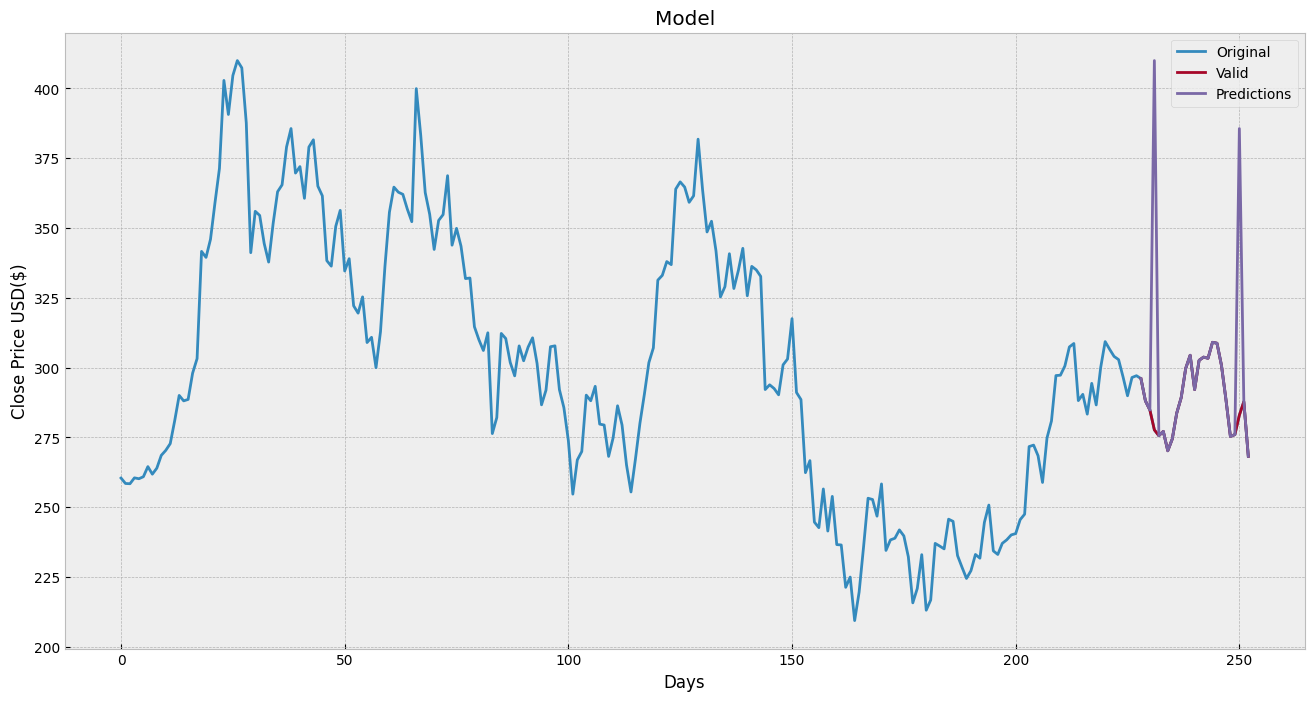

In [15]:
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])
plt.show()

<ipython-input-16-8cf9d23c1fbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


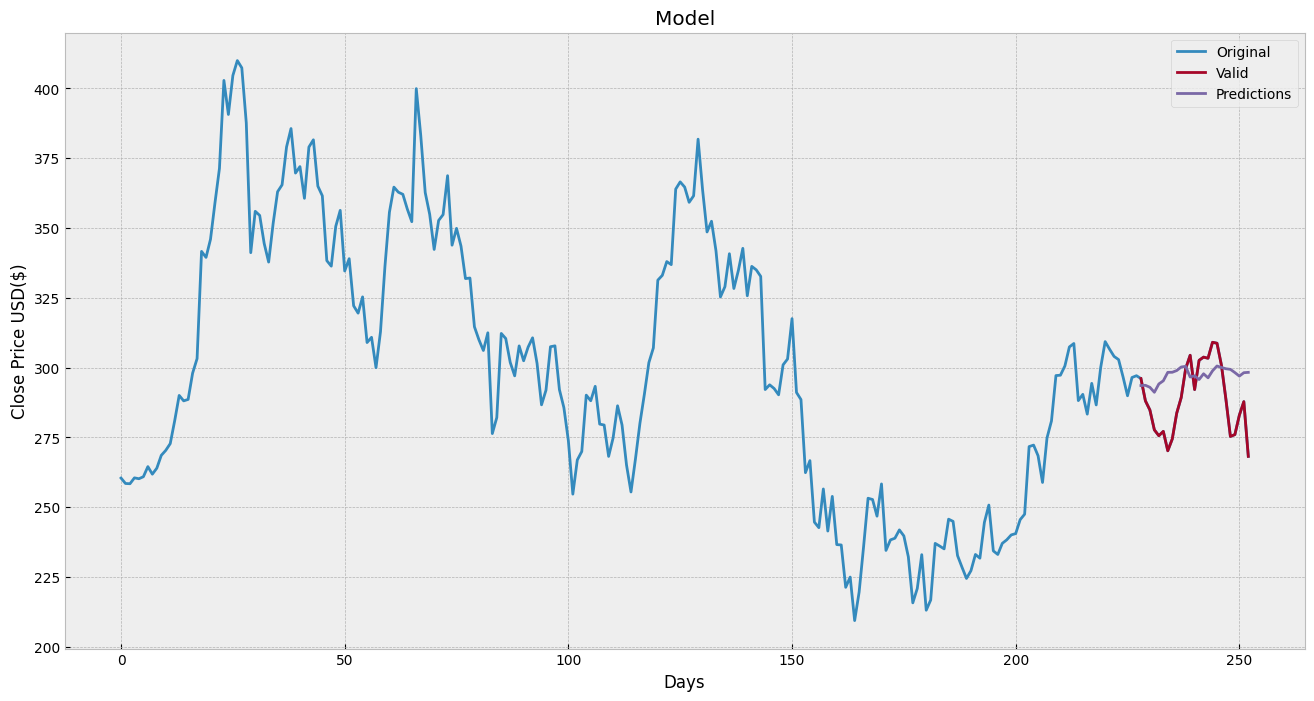

In [16]:
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])
plt.show()